Analytics vidhya training

fathi mhiri

11/5/2022


dowload the dataset from this [link](https://drive.google.com/uc?id=1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8) 

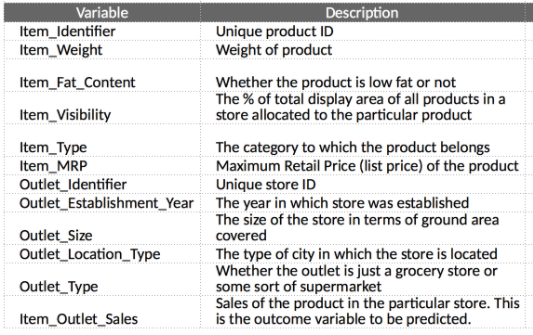

## Objective
The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store (each row of data).

So the idea is to find out the features (properties) of a product, and store which impacts the sales of a product.

In [1]:
import pandas as pd
import numpy as np




In [2]:
df=pd.read_csv("/content/sales_prediction.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df[df["Item_Identifier"]=="FDA15"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


In [5]:
x=df.drop("Item_Outlet_Sales",axis=1)
y=df["Item_Outlet_Sales"]

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

now we will just be working on training data, but of course transformation then will be applied on test data just like trainign data had.

In [7]:
xtrain= X_train.copy()

In [8]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [9]:
xtrain.isna().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
num_data=xtrain.select_dtypes(exclude = ['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [11]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [12]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

# some visualizations

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

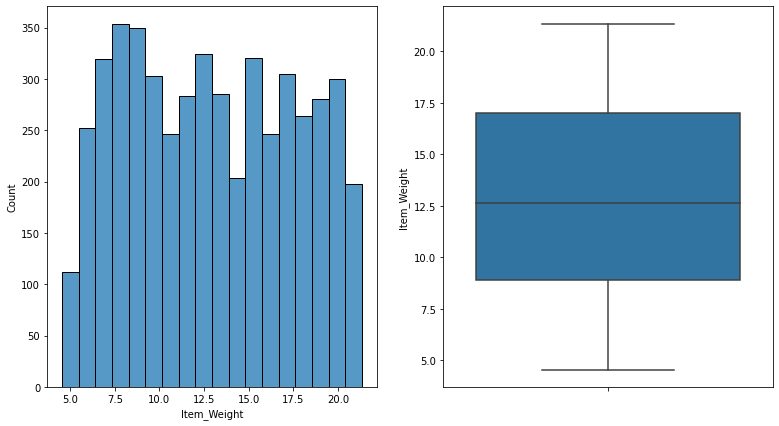

In [14]:
fig, ax = plt.subplots(1,2 , figsize = (13,7))

sns.histplot(data=num_data,x="Item_Weight",ax=ax[0])
sns.boxplot(data=num_data,y="Item_Weight",ax=ax[1])

In [15]:
def visu_num(data,cols):
  for c in cols:
   
    fig, ax = plt.subplots(1,2 , figsize = (13,7))

    sns.histplot(data=data,x=c,ax=ax[0])
    sns.boxplot(data=data,y=c,ax=ax[1])

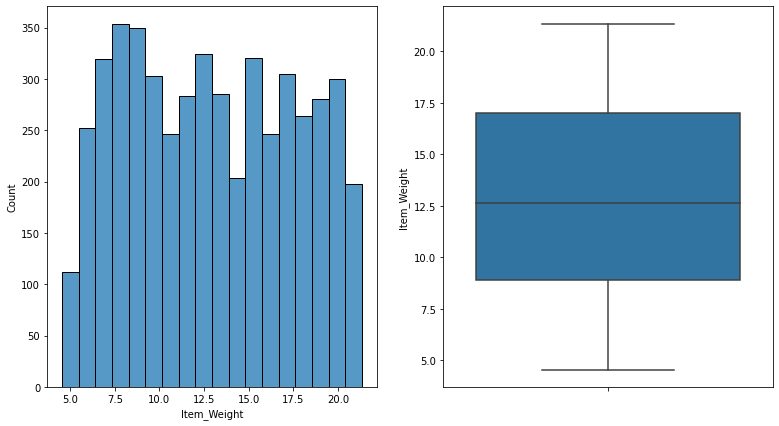

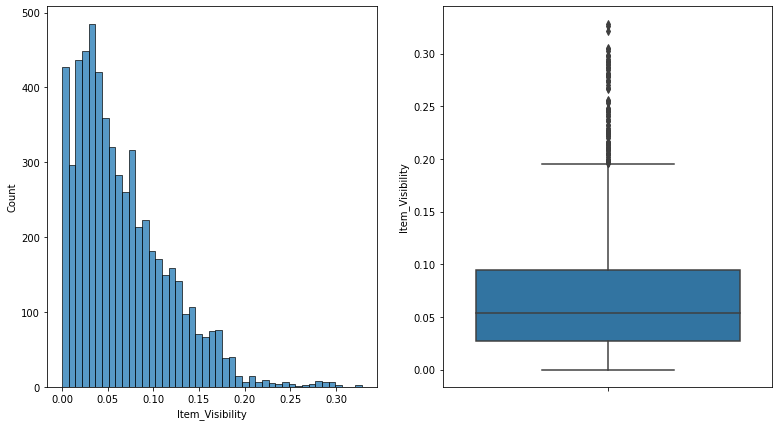

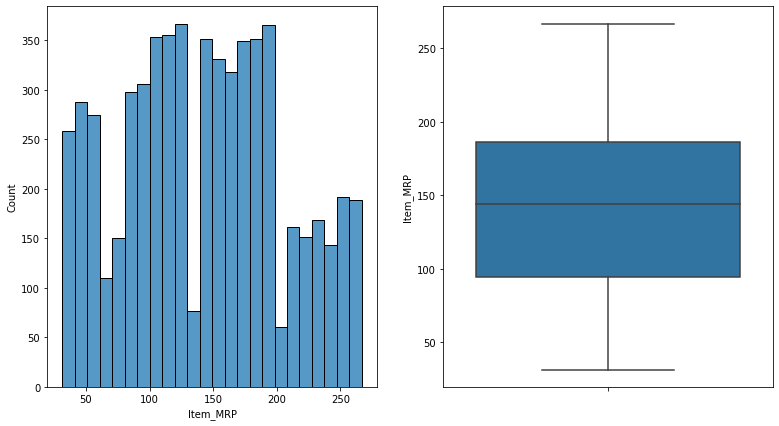

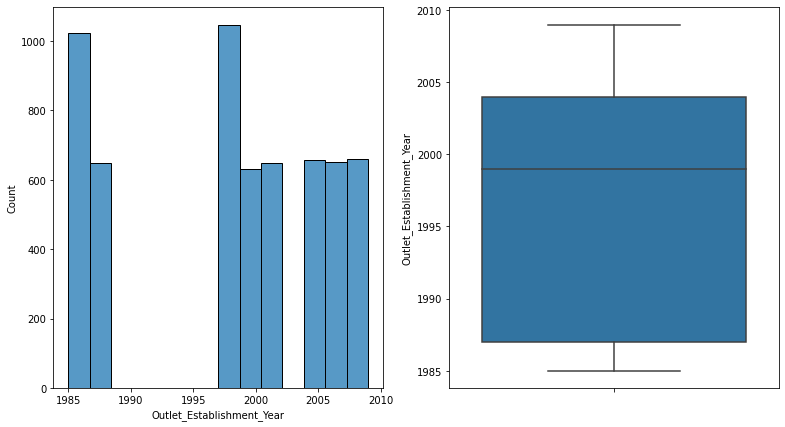

In [16]:
visu_num(num_data,num_data.columns)

the establishment year columns look weird little : its more discrete values , not continious so we will use countplot to visualize it.

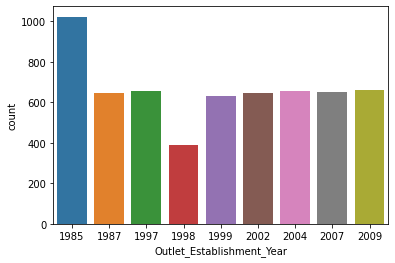

In [17]:
sns.countplot(data= num_data,x="Outlet_Establishment_Year")

now we work with categorical columns:

In [18]:
cat_data = xtrain.select_dtypes(include="object")
cat_data.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3


In [19]:
cat_data.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [20]:
cat_data.isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [21]:
for c in cat_data.columns:
  print (c,'\n')
  print(cat_data[c].value_counts())
  print('\n-----------------------------------------\n')

Item_Identifier 

NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64

-----------------------------------------

Item_Fat_Content 

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

-----------------------------------------

Item_Type 

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

-----------------------------------------

Outlet_Identifier 

OUT027    668
OUT

# Data wrangling and feature engineering

In [22]:
xtrain["Item_Identifier"].apply(lambda x : x[:2]).value_counts()
#xtrain["Item_Identifier"].str[:2]).value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [23]:
#func 1
def modify_item_id(data):
  data["item_id"]=data["Item_Identifier"].apply(lambda x : x[:2])
  return data

In [24]:
xtrain=modify_item_id(xtrain)


In [25]:
xtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,item_id
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store,FD
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1,NC
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD
2537,FDN45,19.35,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1,FD
3528,FDY16,18.35,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1,FD


handling missing values for item_weight



In [26]:
xtrain[["Item_Identifier","Item_Weight"]].drop_duplicates().sort_values(by="Item_Identifier")

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


some weights values are missing for some id in some stores so we have to make some sort of mapping between item_identifier and item_weight of the same items that their weights not missing in some other stores.

In [27]:
table = df.pivot( index="Item_Identifier", values="Item_Weight",columns="Outlet_Identifier")
table
#df.pivot_table( index="Item_Identifier", values="Item_Weight",columns="Outlet_Identifier")

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Identifier,,,,,,,,,,
DRA12,11.600,11.600,11.600,11.60,NaN,NaN,11.600,11.60,NaN,NaN
DRA24,19.350,19.350,19.350,NaN,NaN,NaN,19.350,NaN,NaN,19.350
DRA59,8.270,8.270,8.270,8.27,NaN,NaN,NaN,NaN,8.27,8.270
DRB01,NaN,7.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.390
DRB13,6.115,6.115,6.115,NaN,NaN,NaN,6.115,NaN,NaN,6.115
...,...,...,...,...,...,...,...,...,...,...
NCZ30,6.590,6.590,6.590,NaN,NaN,NaN,6.590,6.59,NaN,6.590
NCZ41,NaN,19.850,19.850,19.85,NaN,NaN,19.850,19.85,NaN,NaN
NCZ42,10.500,10.500,10.500,NaN,NaN,NaN,10.500,NaN,NaN,10.500


In [28]:
tab = df.pivot_table( index="Item_Identifier", values="Item_Weight")
tab

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


we put the values on in dictioonnary so we do mapping easily

In [29]:
item_id_weight = df.pivot_table( index="Item_Identifier", values="Item_Weight").reset_index()
item_id_weight_dic=dict(zip(item_id_weight["Item_Identifier"],item_id_weight["Item_Weight"]))
list(item_id_weight_dic.items())[:8]


[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.3),
 ('DRB48', 16.75)]

in case even in the dictionnary we don't have the value for some reason (new item etc..) we will use the median of the item type

now we make the function to inpute missing weight values:

In [30]:
#func 2
def inpute_weights(data):
  data["Item_Weight"]=data.loc[:,"Item_Weight"].fillna(data.loc[:,"Item_Identifier"].map(item_id_weight_dic))
  return data


In [31]:
xtrain.isna().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
item_id                         0
dtype: int64

In [32]:
inpute_weights(xtrain)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,item_id
1921,FDN08,7.720,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store,FD
655,NCJ42,19.750,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1,NC
2229,FDY47,8.600,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD
2537,FDN45,19.350,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1,FD
3528,FDY16,18.350,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1,FD
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Fruits and Vegetables,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store,FD
5191,FDC41,15.600,Low Fat,0.117575,Frozen Foods,75.6670,OUT017,2007,NaN,Tier 2,Supermarket Type1,FD
5390,NCQ53,17.600,Low Fat,0.018944,Health and Hygiene,237.3590,OUT045,2002,NaN,Tier 2,Supermarket Type1,NC
860,FDL46,20.350,low fat,0.054363,Snack Foods,117.9466,OUT017,2007,NaN,Tier 2,Supermarket Type1,FD


In [33]:
xtrain.isna().sum()

Item_Identifier                 0
Item_Weight                     2
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
item_id                         0
dtype: int64

as we guessed, still 2 values should be filled, for that we will use the type of the item

In [34]:
item_type_weight=df.pivot_table(index = "Item_Type", values = "Item_Weight", aggfunc="median").reset_index()
item_type_weight_dic=dict(zip(item_type_weight["Item_Type"],item_type_weight["Item_Weight"]))
item_type_weight_dic.items()

dict_items([('Baking Goods', 11.65), ('Breads', 10.6), ('Breakfast', 10.695), ('Canned', 12.15), ('Dairy', 13.35), ('Frozen Foods', 12.85), ('Fruits and Vegetables', 13.1), ('Hard Drinks', 10.1), ('Health and Hygiene', 12.15), ('Household', 13.15), ('Meat', 12.35), ('Others', 14.5), ('Seafood', 11.65), ('Snack Foods', 13.15), ('Soft Drinks', 11.8), ('Starchy Foods', 13.175)])

now we do the inputation

In [35]:
#func 3
def inpute_weights2(data):
  data["Item_Weight"]=data.loc[:,"Item_Weight"].fillna(data.loc[:,"Item_Type"].map(item_type_weight_dic))
  return data


In [36]:
xtrain= inpute_weights2(xtrain)

In [37]:
xtrain.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
item_id                         0
dtype: int64

In [38]:
outlet_type_size=xtrain.groupby(["Outlet_Type","Outlet_Size"]).size()

outlet_type_size

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [39]:
outlet_size_mode=xtrain.pivot_table(index = "Outlet_Type" , values = "Outlet_Size" , aggfunc= lambda x: x.mode()[0])
outlet_size_mode
dic = dict(zip(outlet_size_mode.index,outlet_size_mode["Outlet_Size"] ) )
dic

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [40]:
#func 4
def inpute_size(data):
  data["Outlet_Size"]=data.loc[:, "Outlet_Size"].fillna(  data.loc[:,"Outlet_Type"].map(dic))
  return data

In [41]:
inpute_size(xtrain)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,item_id
1921,FDN08,7.720,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,Small,Tier 3,Grocery Store,FD
655,NCJ42,19.750,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1,NC
2229,FDY47,8.600,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD
2537,FDN45,19.350,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,Small,Tier 2,Supermarket Type1,FD
3528,FDY16,18.350,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1,FD
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Fruits and Vegetables,139.1838,OUT010,1998,Small,Tier 3,Grocery Store,FD
5191,FDC41,15.600,Low Fat,0.117575,Frozen Foods,75.6670,OUT017,2007,Small,Tier 2,Supermarket Type1,FD
5390,NCQ53,17.600,Low Fat,0.018944,Health and Hygiene,237.3590,OUT045,2002,Small,Tier 2,Supermarket Type1,NC
860,FDL46,20.350,low fat,0.054363,Snack Foods,117.9466,OUT017,2007,Small,Tier 2,Supermarket Type1,FD


In [42]:
xtrain.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
item_id                      0
dtype: int64

# categorical values

after i changed item identifier, now we return again and we will standarize Item_Fat_Content categories:

In [43]:
#func 5
def standarize_Item_Fat_Content(data):
  data["Item_Fat_Content"]=data["Item_Fat_Content"].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
  return data

In [44]:
xtrain=standarize_Item_Fat_Content(xtrain)

In [45]:
xtrain.Item_Fat_Content.value_counts()

Low Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

In [46]:
xtrain.groupby(["Item_Type","Item_Fat_Content"]).size()

Item_Type              Item_Fat_Content
Baking Goods           Low Fat             229
                       Regular             209
Breads                 Low Fat              92
                       Regular              67
Breakfast              Low Fat              28
                       Regular              52
Canned                 Low Fat             237
                       Regular             213
Dairy                  Low Fat             277
                       Regular             197
Frozen Foods           Low Fat             307
                       Regular             284
Fruits and Vegetables  Low Fat             459
                       Regular             446
Hard Drinks            Low Fat             162
Health and Hygiene     Low Fat             365
Household              Low Fat             648
Meat                   Low Fat             107
                       Regular             168
Others                 Low Fat             124
Seafood             

we need to chanbge Item_Fat_Content for some types : Others, Health and Hygiene, Household

In [47]:
# func 6
def correct_Item_Fat_Content(data):
  data.loc[(data["Item_Type"]=="Others")  | (data["Item_Type"]=="Health and Hygiene")  | 
           (data["Item_Type"]=="Household"),"Item_Fat_Content"]="Not eligible"
  return data

In [48]:
xtrain=correct_Item_Fat_Content(xtrain)

In [49]:
xtrain.groupby(["Item_Type","Item_Fat_Content"]).size()

Item_Type              Item_Fat_Content
Baking Goods           Low Fat             229
                       Regular             209
Breads                 Low Fat              92
                       Regular              67
Breakfast              Low Fat              28
                       Regular              52
Canned                 Low Fat             237
                       Regular             213
Dairy                  Low Fat             277
                       Regular             197
Frozen Foods           Low Fat             307
                       Regular             284
Fruits and Vegetables  Low Fat             459
                       Regular             446
Hard Drinks            Low Fat             162
Health and Hygiene     Not eligible        365
Household              Not eligible        648
Meat                   Low Fat             107
                       Regular             168
Others                 Not eligible        124
Seafood             

In [50]:
def prepare_dataset(data):
  data=modify_item_id(data)
  data=inpute_weights(data)
  data=inpute_weights2(data)
  data=inpute_size(data)
  data=standarize_Item_Fat_Content(data)
  data=correct_Item_Fat_Content(data)
  data=data.drop("Item_Identifier",axis=1)
  return data

In [51]:
X_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [52]:
X_test.isna().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [53]:
X_test=prepare_dataset(X_test)
X_train=prepare_dataset(X_train)

In [54]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,item_id
1921,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,Small,Tier 3,Grocery Store,FD
655,19.75,Not eligible,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1,NC
2229,8.60,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3,FD
2537,19.35,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,Small,Tier 2,Supermarket Type1,FD
3528,18.35,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1,FD


# handling categorical data

In [55]:
cat_data = X_train.select_dtypes(include=["object"])
cat_data

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,item_id
1921,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,FD
655,Not eligible,Household,OUT046,Small,Tier 1,Supermarket Type1,NC
2229,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3,FD
2537,Low Fat,Snack Foods,OUT045,Small,Tier 2,Supermarket Type1,FD
3528,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1,FD
...,...,...,...,...,...,...,...
5734,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,FD
5191,Low Fat,Frozen Foods,OUT017,Small,Tier 2,Supermarket Type1,FD
5390,Not eligible,Health and Hygiene,OUT045,Small,Tier 2,Supermarket Type1,NC
860,Low Fat,Snack Foods,OUT017,Small,Tier 2,Supermarket Type1,FD


In [56]:
from sklearn.preprocessing import OneHotEncoder
hot=OneHotEncoder(handle_unknown='ignore')
hot.fit(cat_data)

OneHotEncoder(handle_unknown='ignore')

In [57]:
hot_names=hot.get_feature_names_out(input_features=cat_data.columns)
hot_names

array(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Not eligible',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'O

In [58]:
len(X_train)

5966

In [59]:
numeric_data = X_train.select_dtypes(exclude=["object"]).reset_index(drop=True)
numeric_data.reset_index()

,index,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0,7.720,0.147904,116.6466,1998
1,1,19.750,0.014301,103.0332,1997
2,2,8.600,0.054221,129.1310,1985
3,3,19.350,0.118342,222.6088,2002
4,4,18.350,0.092150,184.8266,1987
...,...,...,...,...,...
5961,5961,9.395,0.286345,139.1838,1998
5962,5962,15.600,0.117575,75.6670,2007
5963,5963,17.600,0.018944,237.3590,2002
5964,5964,20.350,0.054363,117.9466,2007


In [60]:
Xtrain_hot=pd.DataFrame(hot.transform(cat_data).toarray(),columns=hot_names)
Xtrain_hot.head(2)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Not eligible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_id_DR,item_id_FD,item_id_NC
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [61]:
len(Xtrain_hot)

5966

In [62]:
X_train_final=pd.concat([Xtrain_hot,numeric_data],axis=1)
X_train_final.head(3)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Not eligible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_id_DR,item_id_FD,item_id_NC,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,7.72,0.147904,116.6466,1998
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,19.75,0.014301,103.0332,1997
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,8.60,0.054221,129.1310,1985


In [63]:
len(X_train_final)

5966

In [64]:
X_train_final.columns.values

array(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Not eligible',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'O

In [65]:
cat_data_test = X_test.select_dtypes(include=["object"])
num_data_test = X_test.select_dtypes(exclude=["object"]).reset_index(drop=True)
Xtest_hot=pd.DataFrame(hot.transform(cat_data_test).toarray(),columns=hot_names)
X_test_final=pd.concat([Xtest_hot,num_data_test ],axis=1)
X_test_final=X_test_final[X_train_final.columns.values]

In [66]:
X_test_final.head(2)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Not eligible,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_id_DR,item_id_FD,item_id_NC,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,14.30,0.026300,79.4302,1987
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,7.93,0.071136,42.7086,1997


In [67]:
X_test_final.columns == X_train_final.columns 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# modeling


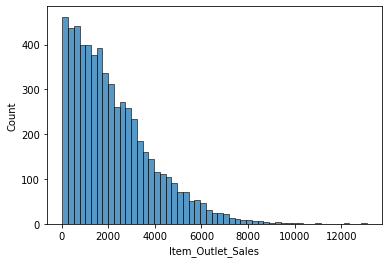

In [68]:
sns.histplot(y_train)

In [69]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgh
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as nm

In [70]:
def train_eval_model(model,xtrain,ytrain,cv=5):
  cv_res = cross_validate(model,xtrain,ytrain,cv=cv,scoring=('r2','neg_root_mean_squared_error'))
  print('model: ',model)
  r2_scores=cv_res["test_r2"]
  print("R2 cv score: ",r2_scores)
  print("R2 cv score mean / stdev : ", np.mean(r2_scores) , '/',np.std(r2_scores))
  
  rmse = cv_res["test_neg_root_mean_squared_error"]
  rmse_scores=[-1*score for score in rmse]
  print("Rmse score: ",rmse_scores)
  print("Rmse cv score mean / stdev : ", np.mean(rmse_scores) , '/',np.std(rmse_scores))


In [71]:
rf= RandomForestRegressor(random_state=44)
train_eval_model(rf,X_train_final,y_train,cv=5)

model:  RandomForestRegressor(random_state=44)
R2 cv score:  [0.57149439 0.52328896 0.53507098 0.56591319 0.5421142 ]
R2 cv score mean / stdev :  0.5475763432928484 / 0.01835434236828759
Rmse score:  [1102.926072604289, 1172.8180124304013, 1190.5560450221717, 1139.1893513619077, 1174.2832828469027]
Rmse cv score mean / stdev :  1155.9545528531346 / 31.33902860959844


In [73]:
gh=GradientBoostingRegressor(random_state=44)
train_eval_model(gh,X_train_final,y_train,cv=5)

model:  GradientBoostingRegressor(random_state=44)
R2 cv score:  [0.60568556 0.58201856 0.5737037  0.617183   0.56648711]
R2 cv score mean / stdev :  0.5890155840140887 / 0.019298888972423316
Rmse score:  [1058.0093068326953, 1098.2002103609757, 1140.0195450305189, 1069.8015793780444, 1142.60283522373]
Rmse cv score mean / stdev :  1101.7266953651929 / 34.87136456350724


In [74]:
hgh = HistGradientBoostingRegressor(random_state=44)
train_eval_model(hgh,X_train_final,y_train,cv=5)

model:  HistGradientBoostingRegressor(random_state=44)
R2 cv score:  [0.58420124 0.54598771 0.55115325 0.58675655 0.55133481]
R2 cv score mean / stdev :  0.5638867110931444 / 0.017752606933135167
Rmse score:  [1086.4499929956833, 1144.5554261420818, 1169.7836848953582, 1111.5029368652642, 1162.3996610732936]
Rmse cv score mean / stdev :  1134.9383403943361 / 31.499677703525226


In [79]:
xgr= xgh.XGBRegressor(objective='reg:squarederror')
train_eval_model(xgr,X_train_final,y_train,cv=5)

model:  XGBRegressor(objective='reg:squarederror')
R2 cv score:  [0.60216154 0.58287281 0.57681059 0.62279803 0.56963789]
R2 cv score mean / stdev :  0.5908561709553256 / 0.01928378203899875
Rmse score:  [1062.726555049921, 1097.0774106420183, 1135.857659915014, 1061.9268488058394, 1138.4430264244438]
Rmse cv score mean / stdev :  1099.2063001674474 / 33.49001142724703


In [78]:
lg=LGBMRegressor(random_state=44)
train_eval_model(lg,X_train_final,y_train,cv=5)

model:  LGBMRegressor(random_state=44)
R2 cv score:  [0.59321688 0.546784   0.55406986 0.59169659 0.53995127]
R2 cv score mean / stdev :  0.5651437187627495 / 0.02274874171455258
Rmse score:  [1074.606861348403, 1143.5512705676508, 1165.9768557271836, 1104.8393392937444, 1177.0535050907679]
Rmse cv score mean / stdev :  1133.2055664055501 / 38.31992640986564


In [81]:
xg= xgh.XGBRegressor(objective='reg:squarederror')
xg.fit(X_train_final,y_train)

XGBRegressor(objective='reg:squarederror')

In [82]:
from sklearn.metrics import r2_score, mean_squared_error

In [83]:
pred=xg.predict(X_test_final)

In [85]:
print('r2 score : ', r2_score(y_test,pred))
print('rmse score : ',  mean_squared_error(y_test,pred,squared=False))

r2 score :  0.5987591693579655
rmse score :  1060.1287513983684


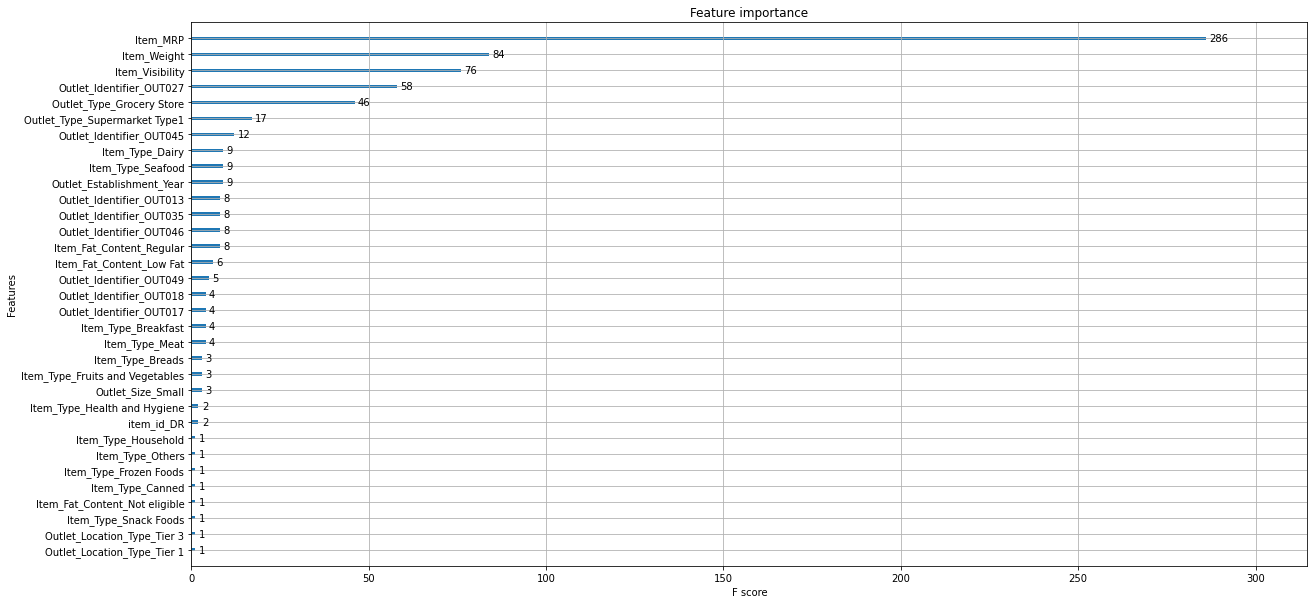

In [86]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1, figsize=(20,10))
plot_importance(xg,ax=ax)